![Alt text](task_unemp.JPG)

C:\Users\yalalvarthi rajkumar\AppData\Local\Temp\ipykernel_2084\1120588207.py:18: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], errors='coerce')


Average Unemployment Rate before COVID-19: 9.23%
Average Unemployment Rate after COVID-19 began: 12.96%


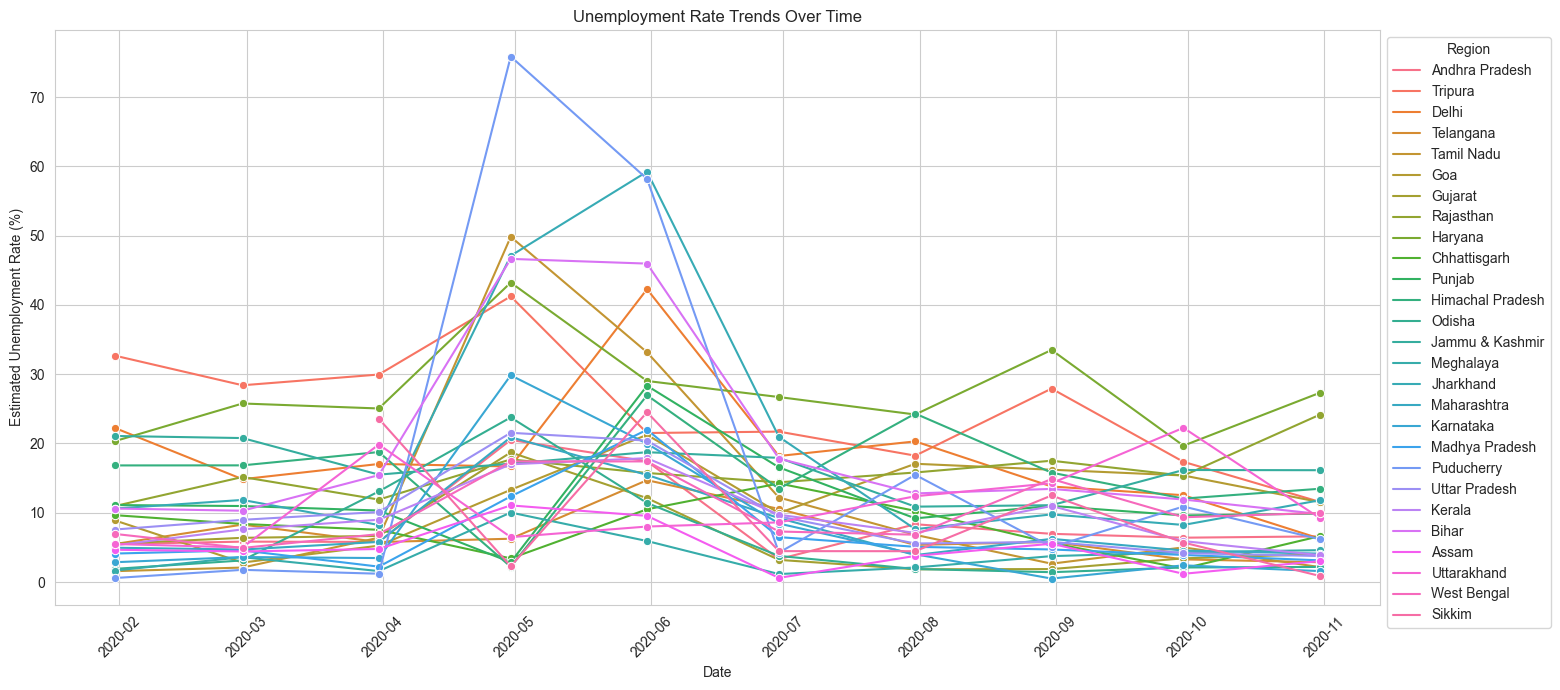

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Load the data from a CSV file
unemployment_data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

# Remove leading spaces in column names
unemployment_data.columns = unemployment_data.columns.str.strip()

# Also strip whitespace from the date strings
unemployment_data['Date'] = unemployment_data['Date'].str.strip()

# Parse the 'Date' column to datetime format, allowing pandas to infer the datetime format
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], errors='coerce')

# Sort the DataFrame based on the 'Date' column
unemployment_data.sort_values('Date', inplace=True)

# Calculate the mean unemployment rate before and after the start of COVID-19 in March 2020
covid_start = pd.Timestamp('2020-03-01')
pre_covid_data = unemployment_data[unemployment_data['Date'] < covid_start]
post_covid_data = unemployment_data[unemployment_data['Date'] >= covid_start]

pre_covid_unemployment_rate = pre_covid_data['Estimated Unemployment Rate (%)'].mean()
post_covid_unemployment_rate = post_covid_data['Estimated Unemployment Rate (%)'].mean()

print(f'Average Unemployment Rate before COVID-19: {pre_covid_unemployment_rate:.2f}%')
print(f'Average Unemployment Rate after COVID-19 began: {post_covid_unemployment_rate:.2f}%')

# Visualize the unemployment trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=unemployment_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Unemployment Rate Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
